## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as st
import os

In [44]:
#setting background of figure black
plt.style.use('dark_background')

In [3]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [12.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [4]:
# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook,curdoc
from bokeh.plotting import figure 
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper, ColorBar, Select, Slider
from bokeh.palettes import Category10, Spectral6
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.models.widgets import Tabs,Panel
from bokeh.transform import linear_cmap
output_notebook()

Loading BokehJS ...

In [5]:
# Study data files
mouse_metadata_path = os.path.join("data","Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
#Looking mouse metadata datasets
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
#shape of dataframe
mouse_metadata.shape

(249, 5)

In [8]:
#columns name
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [9]:
#info of dataframe
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [10]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [11]:
#Checking if there any null value
mouse_metadata.isna().sum()

Mouse ID        0
Drug Regimen    0
Sex             0
Age_months      0
Weight (g)      0
dtype: int64

In [12]:
#Looking the study results dataframe
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
study_results.value_counts('Tumor Volume (mm3)')

Tumor Volume (mm3)
45.000000    250
54.834624      1
55.083632      1
55.076229      1
55.039020      1
            ... 
47.235937      1
47.235692      1
47.227171      1
47.222446      1
78.567014      1
Length: 1644, dtype: int64

In [14]:
#shape of dataframe
study_results.shape

(1893, 4)

In [15]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [16]:
#columns name
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [17]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [18]:
#Checking if there any null value
study_results.isna().sum()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [19]:
# Combine the data into a single dataset
df_combined=pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [20]:
# Display the data table for preview
df_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
df_combined.shape

(1893, 8)

In [22]:
df_combined.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [23]:
df_combined.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [24]:
df_combined.isna().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [25]:
# Checking the number of mice.
df_combined.value_counts("Mouse ID")

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [26]:
df_combined["Mouse ID"].nunique()

249

In [27]:
df_combined.duplicated().sum()

1

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
df_combined.duplicated(subset=['Mouse ID', 'Timepoint']).sum()

5

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 

df_combined[df_combined.duplicated(subset=['Mouse ID'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
df_combined.duplicated(subset=['Mouse ID']).sum()

1644

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_filter=df_combined.drop_duplicates(subset=['Mouse ID'])

In [33]:
# Checking the number of mice in the clean DataFrame.
df_filter.shape

(249, 8)

## Summary Statistics

In [34]:
df_combined.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_combined.describe().loc[['mean', 'std']]


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974


In [36]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
df_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std']).reset_index()

,Drug Regimen,mean,median,std
0,Capomulin,40.675741,41.557809,4.994774
1,Ceftamin,52.591172,51.776157,6.268188
2,Infubinol,52.884795,51.820584,6.567243
3,Ketapril,55.235638,53.698743,8.279709
4,Naftisol,54.331565,52.509285,8.134708
5,Placebo,54.033581,52.288934,7.821003
6,Propriva,52.322552,50.854632,6.507770
7,Ramicane,40.216745,40.673236,4.846308
8,Stelasyn,54.233149,52.431737,7.710419
9,Zoniferol,53.236507,51.818479,6.966589


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std']).reset_index()

,Drug Regimen,mean,median,std
0,Capomulin,40.675741,41.557809,4.994774
1,Ceftamin,52.591172,51.776157,6.268188
2,Infubinol,52.884795,51.820584,6.567243
3,Ketapril,55.235638,53.698743,8.279709
4,Naftisol,54.331565,52.509285,8.134708
5,Placebo,54.033581,52.288934,7.821003
6,Propriva,52.322552,50.854632,6.507770
7,Ramicane,40.216745,40.673236,4.846308
8,Stelasyn,54.233149,52.431737,7.710419
9,Zoniferol,53.236507,51.818479,6.966589


In [38]:
df_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [206]:
df_time=df_combined.groupby('Drug Regimen').count().reset_index()
df_time

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


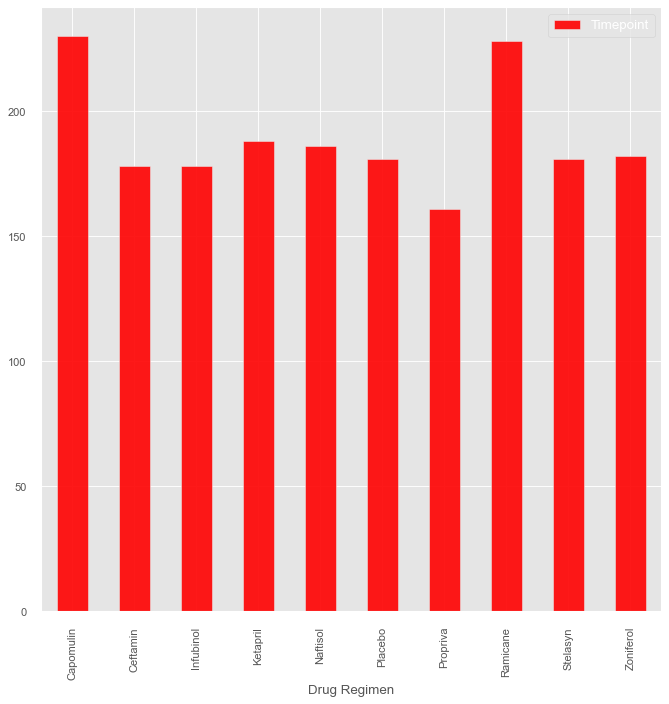

In [207]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig, ax=plt.subplots(figsize=(10,10))
df_time.plot(x='Drug Regimen', y='Timepoint',kind='bar',color='red', alpha=0.9, align='center', ax=ax)
plt.show()

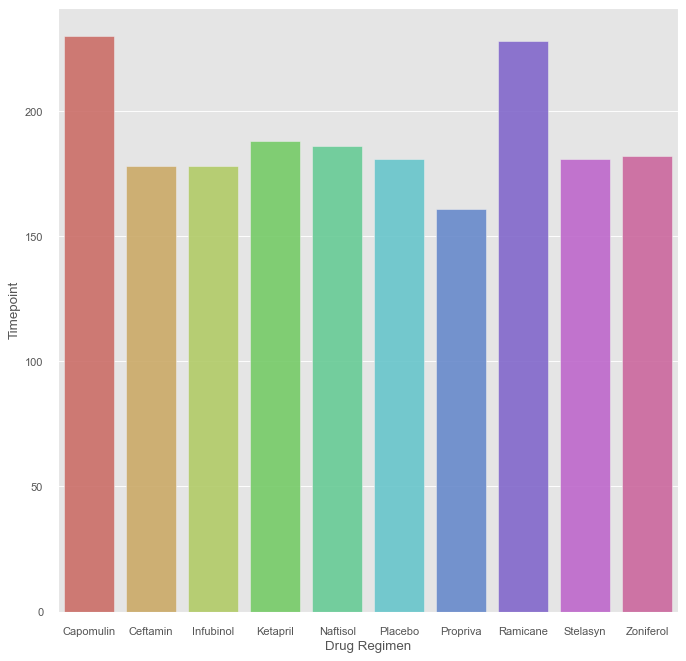

In [217]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',
            data=df_time, alpha=0.9, palette = 'hls',ax=ax)
plt.show()

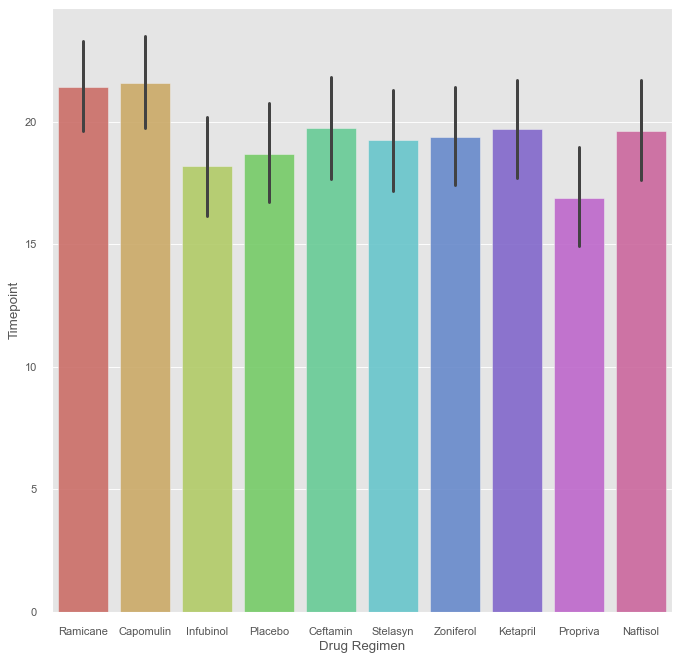

In [215]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',
            data=df_combined, alpha=0.9, palette = 'hls',ax=ax)
plt.show()

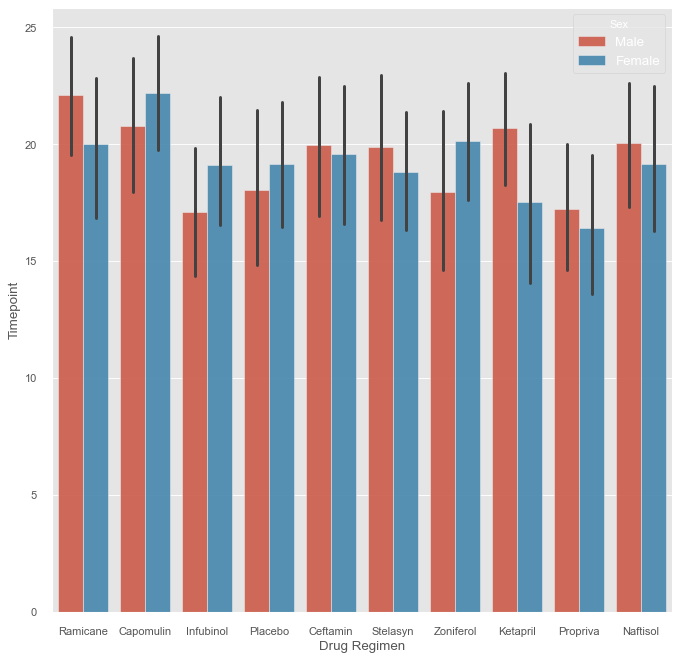

In [216]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',hue='Sex',
            data=df_combined, alpha=0.9,ax=ax)
plt.show()

In [92]:

# Create a new plot: plot

plot=figure(height=600, width=800,
            x_axis_label="Regimen", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')

source=ColumnDataSource(df_time)

# Add circles at x and y
plot.vbar(x='Drug Regimen', top='Timepoint', source=source)

plot.xgrid.grid_line_color = None
plot.y_range.start = 0
show(plot)

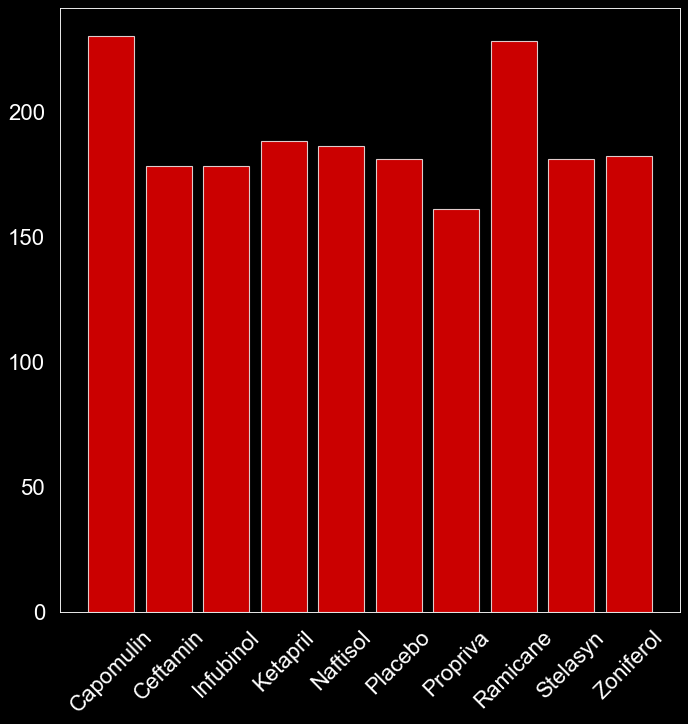

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=np.arange(0, len(df_time['Drug Regimen']),1)
drugs=df_time['Drug Regimen'].tolist()
fig, ax=plt.subplots(figsize=(10,10))
ax.bar(x, df_time['Timepoint'],color='red', alpha=0.8, align='center')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation = 45)
plt.show()


In [49]:
df_gender=df_combined.groupby('Sex').count().reset_index().set_index('Sex')
df_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


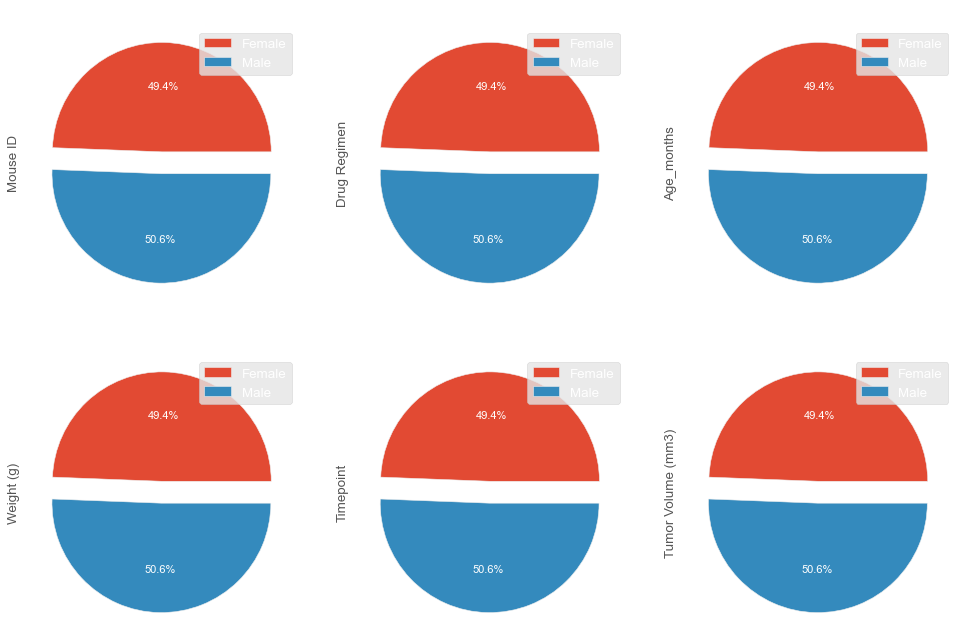

In [51]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(15,10))
explode = (0.1, 0.1)
for i, col in zip(range(1, 7), df_gender.columns):
    ax = fig.add_subplot(2, 3, i)
    df_gender[col].plot(kind='pie',labels= df_gender.index, 
                        autopct='%1.1f%%',title=col,explode=explode, fontsize=10, ax=ax)
    ax.legend()
plt.show()

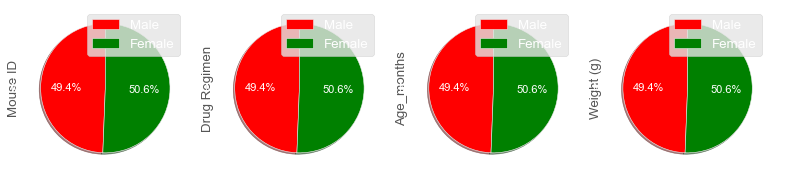

In [52]:
df_gender1=df_gender[[	'Mouse ID',	'Drug Regimen',	'Age_months',	'Weight (g)']]
explode = (0, 0.1)
color=['red', 'green']
labels=["Male", "Female"]
df_gender1.plot(kind='pie',subplots=True,labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

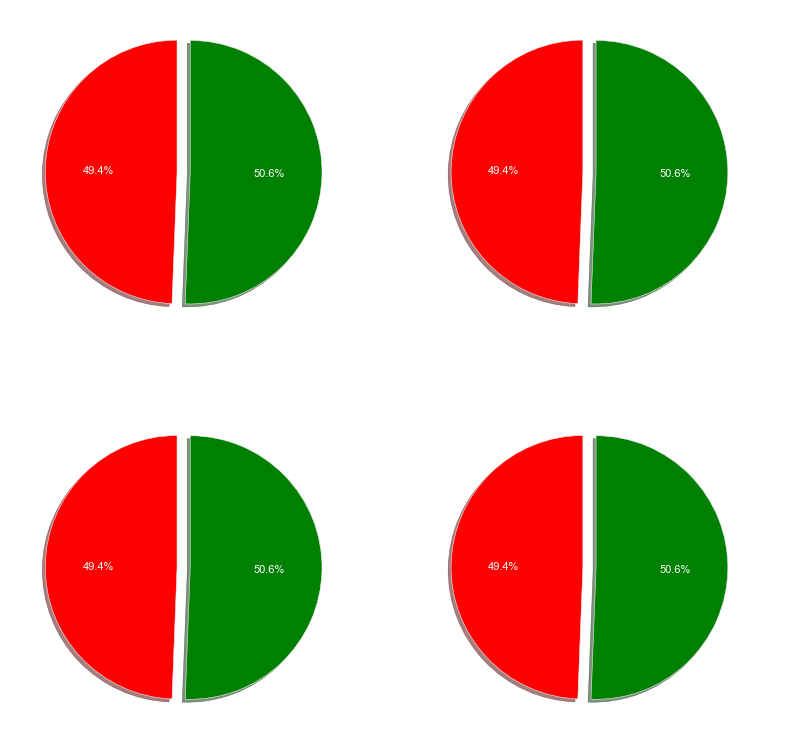

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax=plt.subplots(2,2,figsize=(12,12))
explode = (0, 0.1)
color=['red', 'green']
labels=["Male", "Female"]
ax[0,0].pie(df_gender['Mouse ID'],labels=labels, colors=color,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,0].pie(df_gender['Drug Regimen'],labels=labels, colors=color, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,1].pie(df_gender['Age_months'],labels=labels, colors=color, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,1].pie(df_gender['Tumor Volume (mm3)'],labels=labels, explode=explode,colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [136]:
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_tumor=df_combined.groupby('Drug Regimen').sum()
df_tumor=df_tumor.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
df_tumor=df_tumor.reset_index()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_greater=df_combined[df_combined['Timepoint']==45]
df_greater

df_tumor

,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,3095,4592,4960,9355.420462,164
1,Ramicane,2436,4487,4885,9169.417875,125
2,Infubinol,2889,4841,3235,9413.493529,171
3,Ceftamin,2358,4877,3515,9361.228582,210


In [159]:
quartiles = df_greater['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upperq

68.8702959775

In [202]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=df_tumor['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [186]:
df_box

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Ramicane,g791,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
Ceftamin,y769,Female,6,27,45,68.594745,4
Ceftamin,y865,Male,23,26,45,64.729837,3
Infubinol,z581,Female,24,25,45,62.754451,3


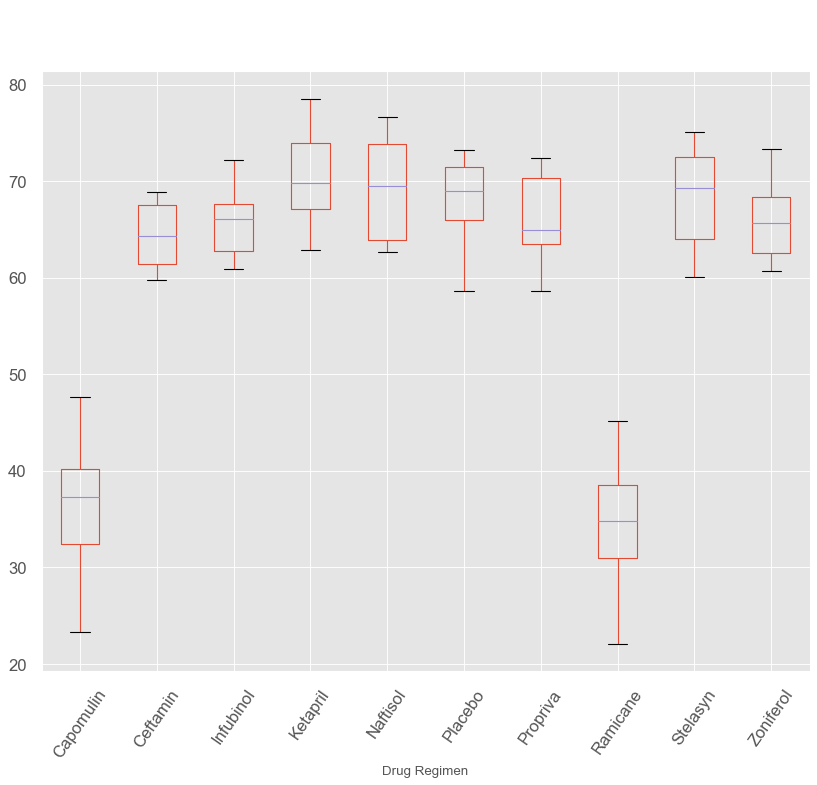

In [191]:

fig, ax=plt.subplots()
df_greater.boxplot(by='Drug Regimen',column=['Tumor Volume (mm3)'],
                   rot=55, fontsize=15,ax=ax)
plt.show()

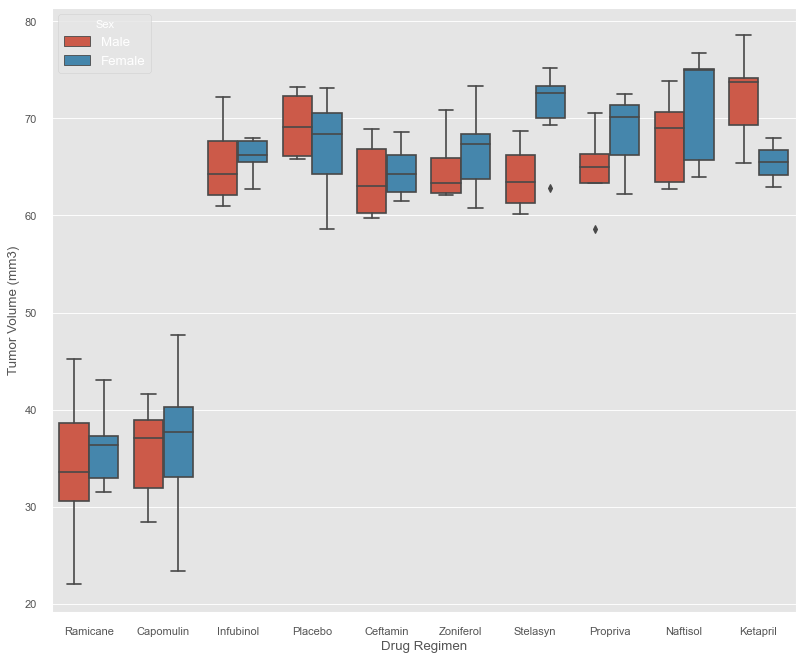

In [171]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax=plt.subplots()
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=df_greater, 
            hue='Sex', ax=ax)
plt.show()

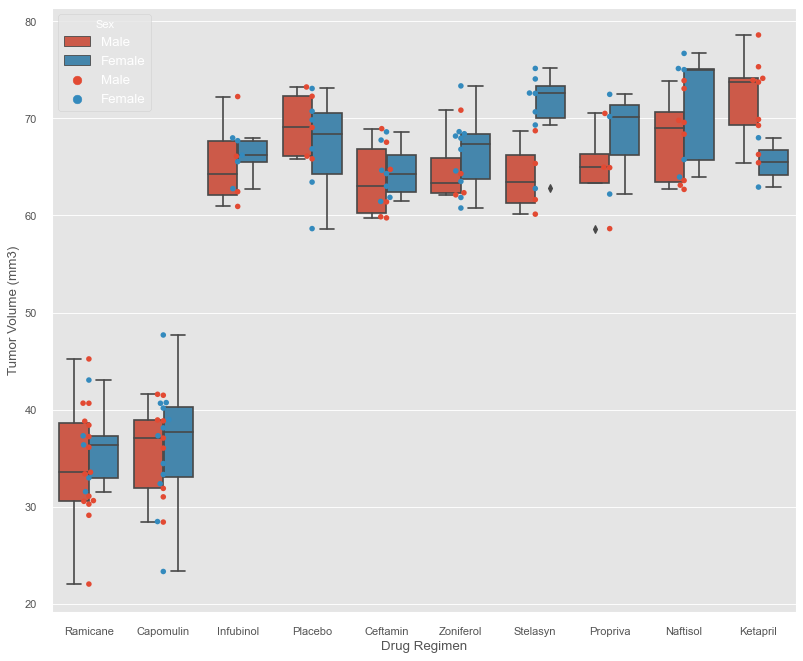

In [175]:
fig, ax=plt.subplots()
sns.boxplot(x=ç,data=df_greater, 
            hue='Sex', ax=ax)
sns.swarmplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=df_greater, 
            hue='Sex', ax=ax)
plt.show()

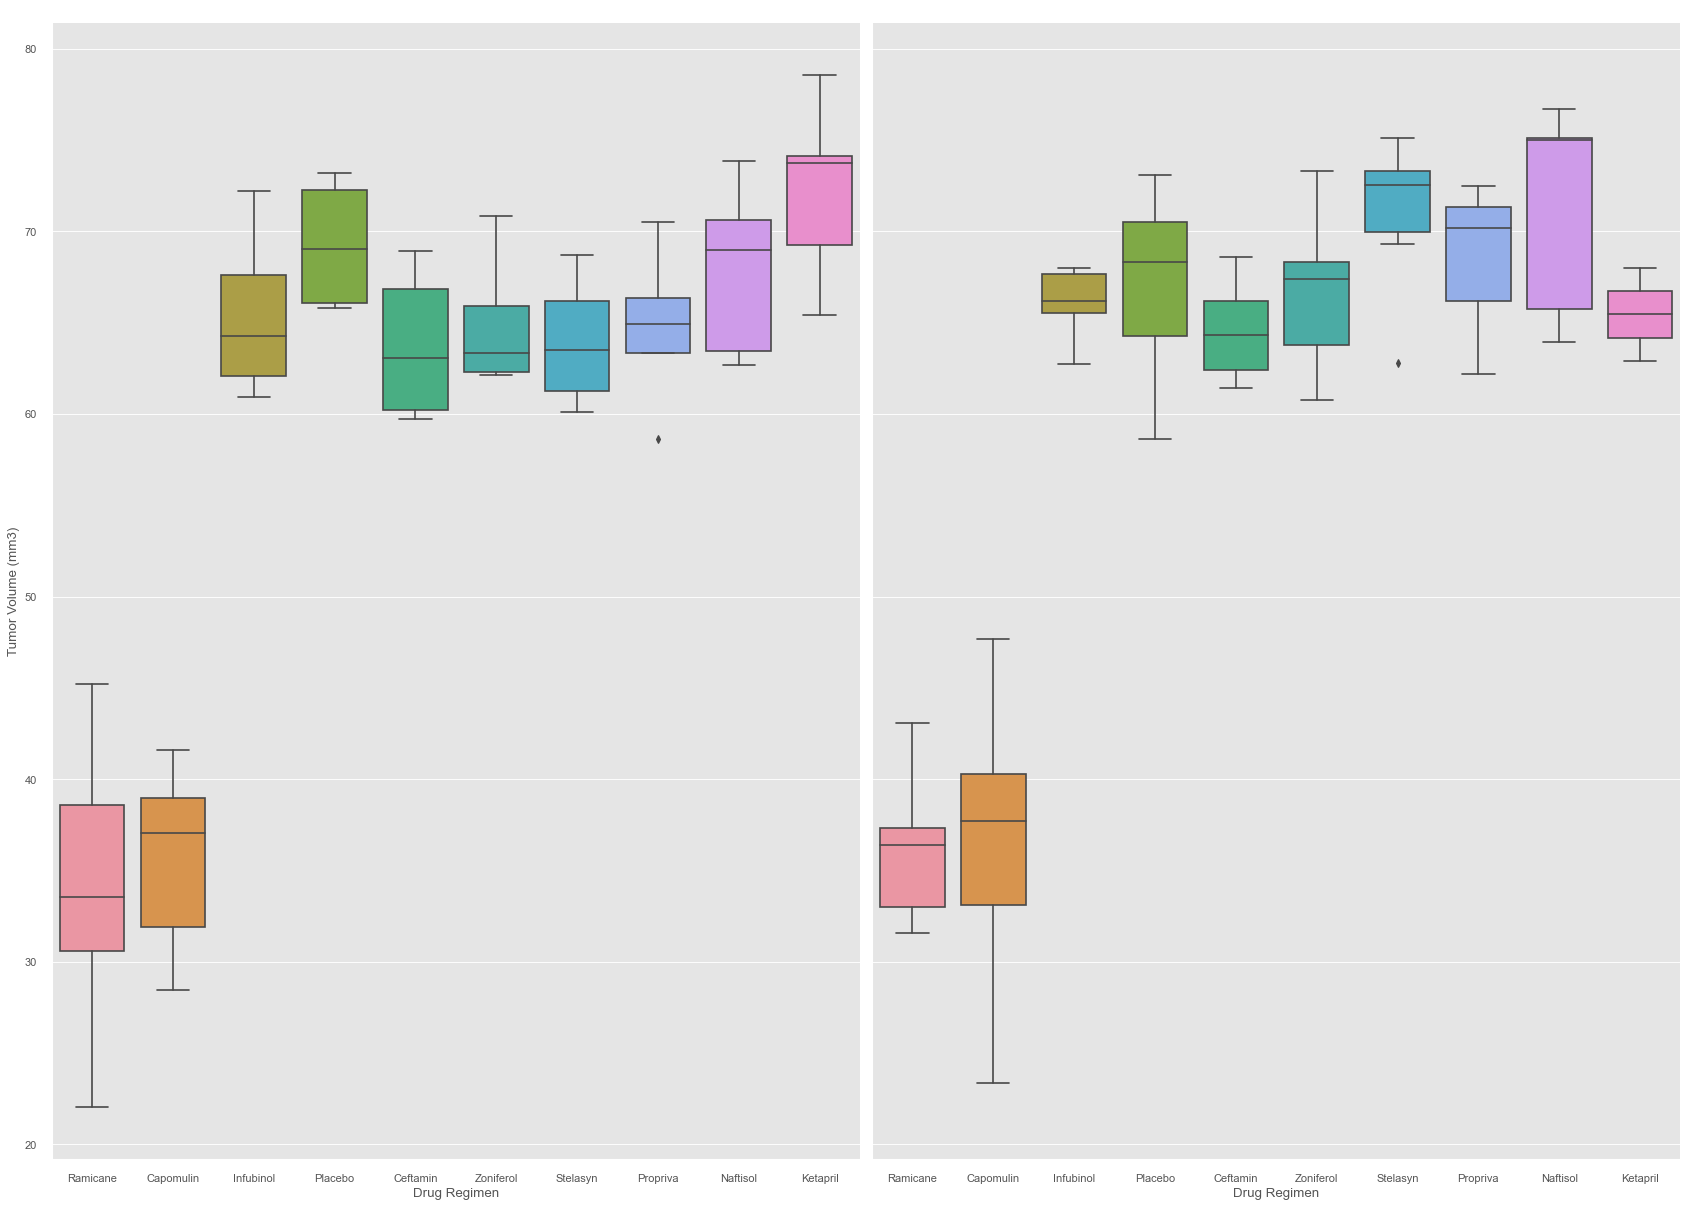

In [180]:

g=sns.catplot(x='Drug Regimen', y='Tumor Volume (mm3)',kind='box',
              data=df_greater, col='Sex',height=15, aspect=.7)
plt.show()

## Line and Scatter Plots

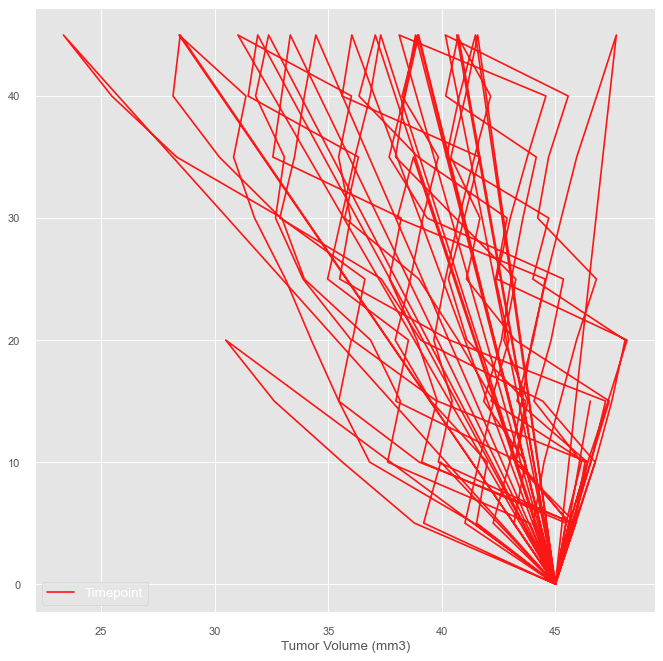

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_camp=df_combined[df_combined['Drug Regimen']=='Capomulin']
fig, ax=plt.subplots(figsize=(10,10))
df_camp.plot(x='Tumor Volume (mm3)', y='Timepoint',kind='line',color='red', alpha=0.9,  ax=ax)
plt.show()

In [114]:
df_camp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


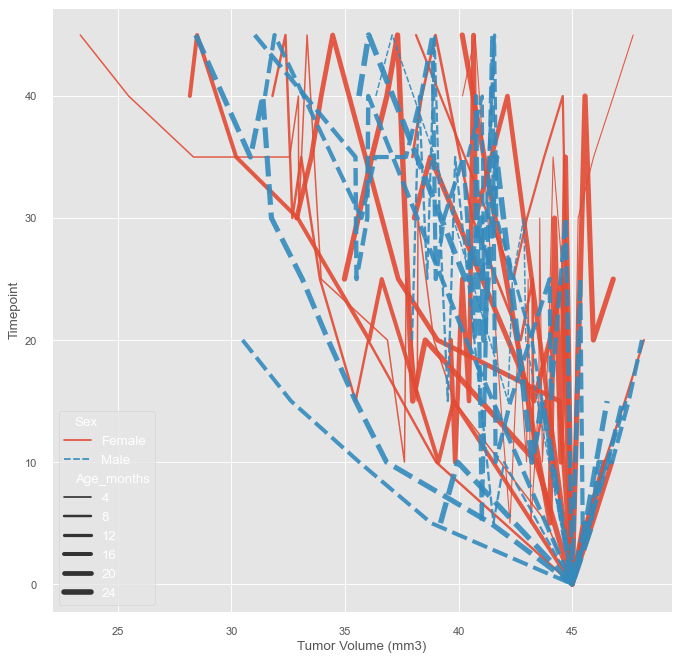

In [135]:
fig, ax=plt.subplots(figsize=(10,10))
sns.lineplot(x='Tumor Volume (mm3)', y='Timepoint', hue='Sex', 
                size='Age_months',style='Sex',sizes=(1,5),
                data=df_camp,alpha=0.9,ax=ax)
plt.show()

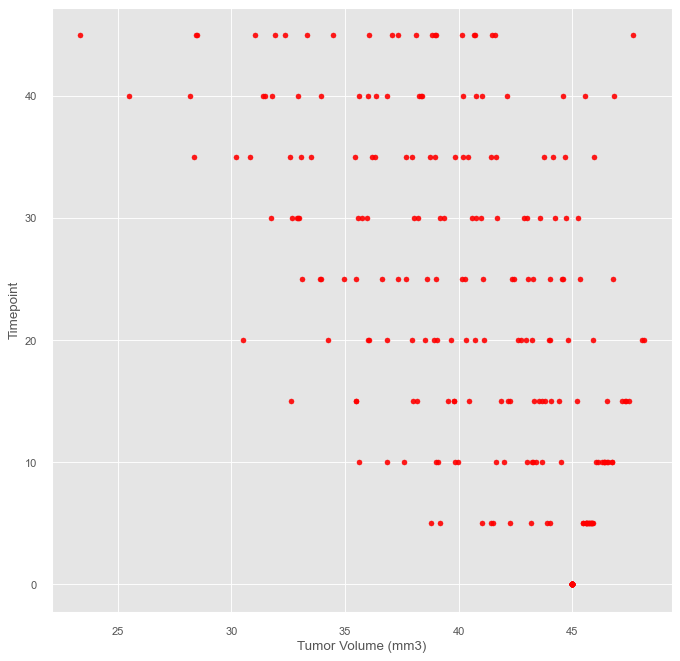

In [121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_camp=df_combined[df_combined['Drug Regimen']=='Capomulin']
fig, ax=plt.subplots(figsize=(10,10))
df_camp.plot(x='Tumor Volume (mm3)', y='Timepoint',kind='scatter',color='red', alpha=0.9,  ax=ax)
plt.show()

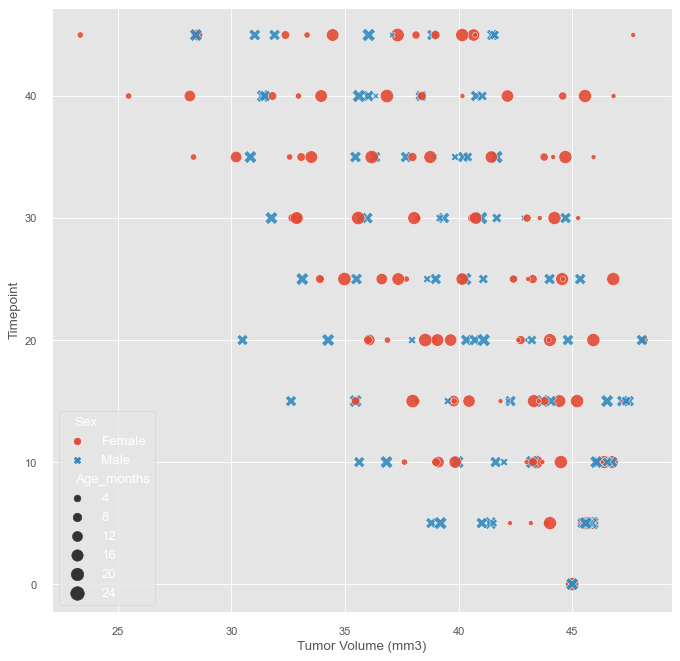

In [129]:
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x='Tumor Volume (mm3)', y='Timepoint', hue='Sex', 
                size='Age_months',style='Sex',sizes=(20, 150),
                data=df_camp,alpha=0.9,ax=ax)
plt.show()

In [108]:

# Create a new plot: plot

plot=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')

source=ColumnDataSource(df_camp)

# Add circles at x and y
plot.circle(x='Tumor Volume (mm3)', y='Timepoint', color='green', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
hover=HoverTool(tooltips=None, mode='hline')
plot.add_tools(hover)
plot.xgrid.grid_line_color = None
show(plot)

In [200]:
df_camp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [201]:

# Create a new plot: plot

plot1=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot2=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot3=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot4=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
source=ColumnDataSource(df_camp)

# Add circles at x and y
plot1.circle(x='Tumor Volume (mm3)', y='Timepoint', color='green', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
plot2.circle(x='Tumor Volume (mm3)', y='Weight (g)', color='blue', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
plot3.circle(x='Tumor Volume (mm3)', y='Age_months', color='red', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)


first=Panel(child=plot1, title='Timepoint')
second=Panel(child=plot2, title='Weight')
third=Panel(child=plot3, title='Age_months')


tabs=Tabs(tabs=[first, second,third])
hover=HoverTool(tooltips=None, mode='hline')
plot1.add_tools(hover)
plot2.add_tools(hover)
plot3.add_tools(hover)


show(tabs)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
